# Introduction to Web Crawler

The purpose of this report is to find a website and also to extract data from it using a web scraper to apply NLP techniques. For this “ABC news” has been chosen as the website for the data to be scrapped. There are multiple reasons for choosing this website. Firstly it is a public news service in Australia, the task is to help people find the most relevant new article, but people are curious and reading news articles of similar type would make recommenders only suggest those types and not provide with other varieties. This is a problem as it does cover the vast other news articles and would make the recommender highly biased. We are going to tackle this problem and the first step involved is to scrape the website for the information and store it in a dataset for us to work on.

# Web Scraping


The process of scraping and extracting data from websites by directly accessing the HTTP protocol or web browser is called Web Scraping. As we are going to scrape from ABC, we can see that the website contains images, links to other websites, news articles and other information tabs






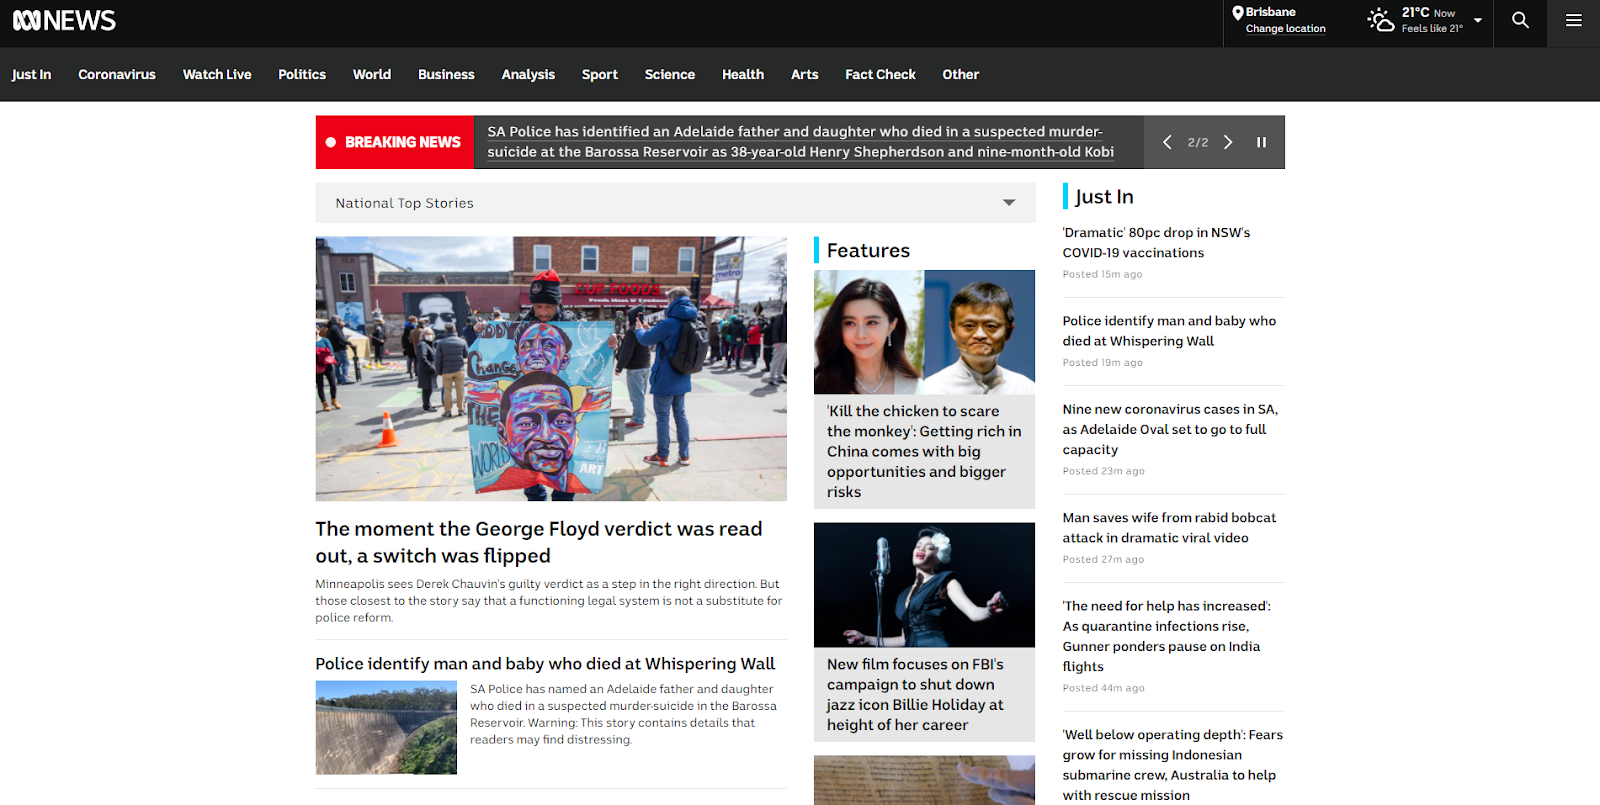

We are to extract information from this website, before we extract information from this website we are to understand the structure of it, so that it will help us write a script to only target the specific data and extract it. When observing the HTML of the website it is as follows

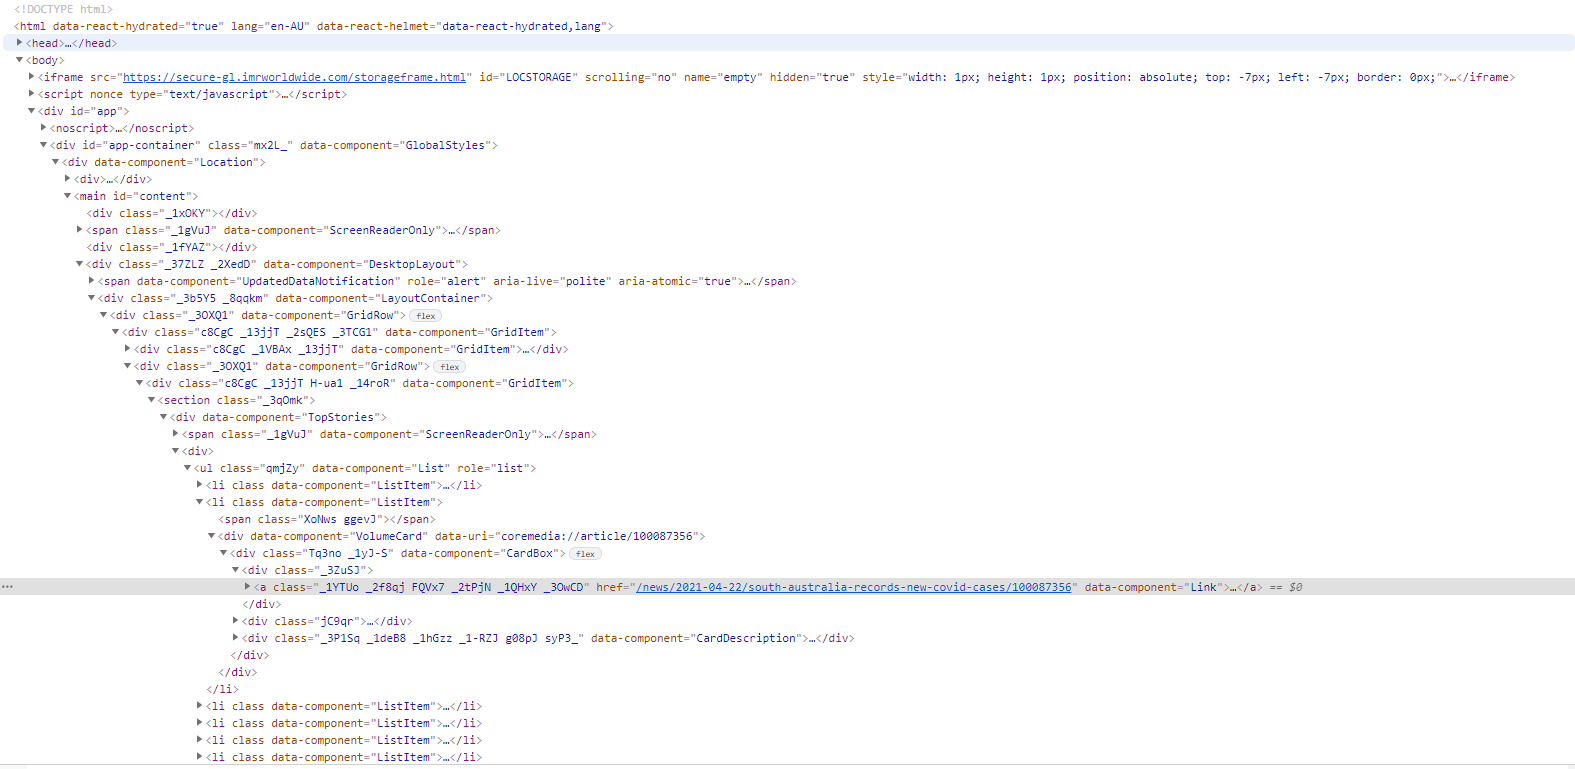

It is observed that there are multiple divisions and classes containing the links, images, tables , hyperlinks and other information. As there is too much unnecessary information it is hard to scrape the required information for the analysis. I have chosen to use REST API to scrape the data from the website. REST stands for Representational State Transfer, it is one of the web service communication protocols. SOAP is one of the standard protocols used in dealing with web service interface, but REST operates through a consistent and solitary interface to access the named resources this would simplify the process of extracting information. 

As using the other protocols to navigate to the specific content and extracting that said information is hard. So we are using “newsapi” in this web scraping project, it is a simple REST API which returns us JSON search results. This would help us acquire the dataset and its respective metadata from online news media.

In regards to the Website copyright considerations, after going through the ABC Privacy Policies and Statements the information is allowed for personal and non commercial use and is permitted to use.


# Metadata

As the news articles in the ABC website and other images in it are tagged with metadata, which is primarily used by the authors of such articles to control how the content they have written appears in the website. After thorough inspection of the JSON search results we have decided to only scrape for information like author, title, description and published date.

As a public news agency the amount of news articles it generates would be huge and it would take a huge amount of time and resources to scrape information from the site. To solve this problem we have narrowed down the scope of search to specific dates from 18/03/2021 to 16/04/2021.

The respective images are the retrived information from the website :


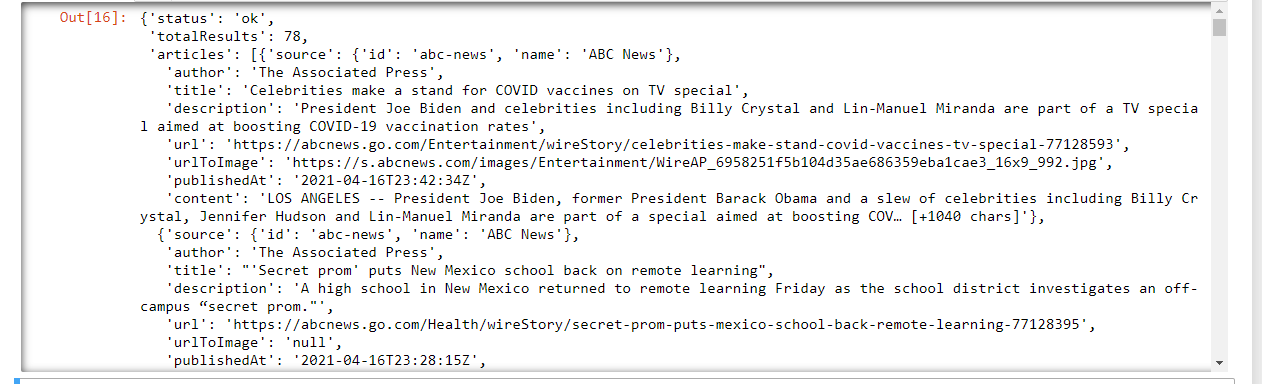

The respective python code for the web scraper is as follows :

In [7]:
from newsapi import NewsApiClient
from textblob import TextBlob
import numpy as np
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#newsapi = NewsApiClient(api_key='53f73de897ed4b838dd60cb7b158ce4e')
#newsapi = NewsApiClient(api_key='fc8174e22f9a48b88b9e1a169c006feb')
newsapi = NewsApiClient(api_key = '8ed564d6a37f49ca8923b9f69737f540')
#newsapi  = NewsApiClient(api_key = 'd1538a7176b94666a9a68f2642220314')


In [4]:
all_articles1 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-15',
                                       to='2021-04-16',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles2 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-14',
                                       to='2021-04-15',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles3 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-13',
                                       to='2021-04-14',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles4 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-12',
                                       to='2021-04-13',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles5 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-11',
                                       to='2021-04-12',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles6 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-10',
                                       to='2021-04-11',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles7 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-09',
                                       to='2021-04-10',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles8 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-08',
                                       to='2021-04-09',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles9 = newsapi.get_everything(q='COVID',
                                       sources='abc-news',
                                       domains='abcnews.go.com',
                                       from_param='2021-04-07',
                                       to='2021-04-08',
                                       language='en',
                                       sort_by='publishedAt',
                                       page_size=100)
all_articles10 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-04-06',
                                        to='2021-04-07',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles11 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-04-05',
                                        to='2021-04-06',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles12 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-04-04',
                                        to='2021-04-05',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles13 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-04-03',
                                        to='2021-04-04',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles14 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-04-02',
                                        to='2021-04-03',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles15 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-04-01',
                                        to='2021-04-02',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles16 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-31',
                                        to='2021-04-01',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles17 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-30',
                                        to='2021-03-31',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles18 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-29',
                                        to='2021-03-30',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles19 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-28',
                                        to='2021-03-29',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles20 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-27',
                                        to='2021-03-28',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles21 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-26',
                                        to='2021-03-27',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles22 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-25',
                                        to='2021-03-26',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles23 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-24',
                                        to='2021-03-25',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles24 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-23',
                                        to='2021-03-24',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles25 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-22',
                                        to='2021-03-23',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles26 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-21',
                                        to='2021-03-22',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles27 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-20',
                                        to='2021-03-21',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles28 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-19',
                                        to='2021-03-20',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles29 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-18',
                                        to='2021-03-19',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)
all_articles30 = newsapi.get_everything(q='COVID',
                                        sources='abc-news',
                                        domains='abcnews.go.com',
                                        from_param='2021-03-17',
                                        to='2021-03-18',
                                        language='en',
                                        sort_by='publishedAt',
                                        page_size=100)

NewsAPIException: {'status': 'error', 'code': 'parameterInvalid', 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2021-03-21, but you have requested 2021-03-21. You may need to upgrade to a paid plan.'}

In [ ]:
abcnews_data = {}
abcnews_data['author'] = []
abcnews_data['title'] = []
abcnews_data['description'] = []
abcnews_data['url'] = []
abcnews_data['date'] = []

for i in range(len(all_articles1['articles'])):
    abcnews_data['author'].append(all_articles1['articles'][i]['author'])
    abcnews_data['title'].append(all_articles1['articles'][i]['title'])
    abcnews_data['description'].append(all_articles1['articles'][i]['description'])
    abcnews_data['url'].append(all_articles1['articles'][i]['url'])
    abcnews_data['date'].append(all_articles1['articles'][i]['publishedAt'])
for i in range(len(all_articles2['articles'])):
    abcnews_data['author'].append(all_articles2['articles'][i]['author'])
    abcnews_data['title'].append(all_articles2['articles'][i]['title'])
    abcnews_data['description'].append(all_articles2['articles'][i]['description'])
    abcnews_data['url'].append(all_articles2['articles'][i]['url'])
    abcnews_data['date'].append(all_articles2['articles'][i]['publishedAt'])
for i in range(len(all_articles3['articles'])):
    abcnews_data['author'].append(all_articles3['articles'][i]['author'])
    abcnews_data['title'].append(all_articles3['articles'][i]['title'])
    abcnews_data['description'].append(all_articles3['articles'][i]['description'])
    abcnews_data['url'].append(all_articles3['articles'][i]['url'])
    abcnews_data['date'].append(all_articles3['articles'][i]['publishedAt'])
for i in range(len(all_articles4['articles'])):
    abcnews_data['author'].append(all_articles4['articles'][i]['author'])
    abcnews_data['title'].append(all_articles4['articles'][i]['title'])
    abcnews_data['description'].append(all_articles4['articles'][i]['description'])
    abcnews_data['url'].append(all_articles4['articles'][i]['url'])
    abcnews_data['date'].append(all_articles4['articles'][i]['publishedAt'])
for i in range(len(all_articles5['articles'])):
    abcnews_data['author'].append(all_articles5['articles'][i]['author'])
    abcnews_data['title'].append(all_articles5['articles'][i]['title'])
    abcnews_data['description'].append(all_articles5['articles'][i]['description'])
    abcnews_data['url'].append(all_articles5['articles'][i]['url'])
    abcnews_data['date'].append(all_articles5['articles'][i]['publishedAt'])
for i in range(len(all_articles6['articles'])):
    abcnews_data['author'].append(all_articles6['articles'][i]['author'])
    abcnews_data['title'].append(all_articles6['articles'][i]['title'])
    abcnews_data['description'].append(all_articles6['articles'][i]['description'])
    abcnews_data['url'].append(all_articles6['articles'][i]['url'])
    abcnews_data['date'].append(all_articles6['articles'][i]['publishedAt'])
for i in range(len(all_articles7['articles'])):
    abcnews_data['author'].append(all_articles7['articles'][i]['author'])
    abcnews_data['title'].append(all_articles7['articles'][i]['title'])
    abcnews_data['description'].append(all_articles7['articles'][i]['description'])
    abcnews_data['url'].append(all_articles7['articles'][i]['url'])
    abcnews_data['date'].append(all_articles7['articles'][i]['publishedAt'])
for i in range(len(all_articles8['articles'])):
    abcnews_data['author'].append(all_articles8['articles'][i]['author'])
    abcnews_data['title'].append(all_articles8['articles'][i]['title'])
    abcnews_data['description'].append(all_articles8['articles'][i]['description'])
    abcnews_data['url'].append(all_articles8['articles'][i]['url'])
    abcnews_data['date'].append(all_articles8['articles'][i]['publishedAt'])
for i in range(len(all_articles9['articles'])):
    abcnews_data['author'].append(all_articles9['articles'][i]['author'])
    abcnews_data['title'].append(all_articles9['articles'][i]['title'])
    abcnews_data['description'].append(all_articles9['articles'][i]['description'])
    abcnews_data['url'].append(all_articles9['articles'][i]['url'])
    abcnews_data['date'].append(all_articles9['articles'][i]['publishedAt'])
for i in range(len(all_articles10['articles'])):
    abcnews_data['author'].append(all_articles10['articles'][i]['author'])
    abcnews_data['title'].append(all_articles10['articles'][i]['title'])
    abcnews_data['description'].append(all_articles10['articles'][i]['description'])
    abcnews_data['url'].append(all_articles10['articles'][i]['url'])
    abcnews_data['date'].append(all_articles10['articles'][i]['publishedAt'])
for i in range(len(all_articles11['articles'])):
    abcnews_data['author'].append(all_articles11['articles'][i]['author'])
    abcnews_data['title'].append(all_articles11['articles'][i]['title'])
    abcnews_data['description'].append(all_articles11['articles'][i]['description'])
    abcnews_data['url'].append(all_articles11['articles'][i]['url'])
    abcnews_data['date'].append(all_articles11['articles'][i]['publishedAt'])
for i in range(len(all_articles12['articles'])):
    abcnews_data['author'].append(all_articles12['articles'][i]['author'])
    abcnews_data['title'].append(all_articles12['articles'][i]['title'])
    abcnews_data['description'].append(all_articles12['articles'][i]['description'])
    abcnews_data['url'].append(all_articles12['articles'][i]['url'])
    abcnews_data['date'].append(all_articles12['articles'][i]['publishedAt'])
for i in range(len(all_articles13['articles'])):
    abcnews_data['author'].append(all_articles13['articles'][i]['author'])
    abcnews_data['title'].append(all_articles13['articles'][i]['title'])
    abcnews_data['description'].append(all_articles13['articles'][i]['description'])
    abcnews_data['url'].append(all_articles13['articles'][i]['url'])
    abcnews_data['date'].append(all_articles13['articles'][i]['publishedAt'])
for i in range(len(all_articles14['articles'])):
    abcnews_data['author'].append(all_articles14['articles'][i]['author'])
    abcnews_data['title'].append(all_articles14['articles'][i]['title'])
    abcnews_data['description'].append(all_articles14['articles'][i]['description'])
    abcnews_data['url'].append(all_articles14['articles'][i]['url'])
    abcnews_data['date'].append(all_articles14['articles'][i]['publishedAt'])
for i in range(len(all_articles15['articles'])):
    abcnews_data['author'].append(all_articles15['articles'][i]['author'])
    abcnews_data['title'].append(all_articles15['articles'][i]['title'])
    abcnews_data['description'].append(all_articles15['articles'][i]['description'])
    abcnews_data['url'].append(all_articles15['articles'][i]['url'])
    abcnews_data['date'].append(all_articles15['articles'][i]['publishedAt'])
for i in range(len(all_articles16['articles'])):
    abcnews_data['author'].append(all_articles16['articles'][i]['author'])
    abcnews_data['title'].append(all_articles16['articles'][i]['title'])
    abcnews_data['description'].append(all_articles16['articles'][i]['description'])
    abcnews_data['url'].append(all_articles16['articles'][i]['url'])
    abcnews_data['date'].append(all_articles16['articles'][i]['publishedAt'])
for i in range(len(all_articles17['articles'])):
    abcnews_data['author'].append(all_articles17['articles'][i]['author'])
    abcnews_data['title'].append(all_articles17['articles'][i]['title'])
    abcnews_data['description'].append(all_articles17['articles'][i]['description'])
    abcnews_data['url'].append(all_articles17['articles'][i]['url'])
    abcnews_data['date'].append(all_articles17['articles'][i]['publishedAt'])
for i in range(len(all_articles18['articles'])):
    abcnews_data['author'].append(all_articles18['articles'][i]['author'])
    abcnews_data['title'].append(all_articles18['articles'][i]['title'])
    abcnews_data['description'].append(all_articles18['articles'][i]['description'])
    abcnews_data['url'].append(all_articles18['articles'][i]['url'])
    abcnews_data['date'].append(all_articles18['articles'][i]['publishedAt'])
for i in range(len(all_articles19['articles'])):
    abcnews_data['author'].append(all_articles19['articles'][i]['author'])
    abcnews_data['title'].append(all_articles19['articles'][i]['title'])
    abcnews_data['description'].append(all_articles19['articles'][i]['description'])
    abcnews_data['url'].append(all_articles19['articles'][i]['url'])
    abcnews_data['date'].append(all_articles19['articles'][i]['publishedAt'])
for i in range(len(all_articles20['articles'])):
    abcnews_data['author'].append(all_articles20['articles'][i]['author'])
    abcnews_data['title'].append(all_articles20['articles'][i]['title'])
    abcnews_data['description'].append(all_articles20['articles'][i]['description'])
    abcnews_data['url'].append(all_articles20['articles'][i]['url'])
    abcnews_data['date'].append(all_articles20['articles'][i]['publishedAt'])
for i in range(len(all_articles21['articles'])):
    abcnews_data['author'].append(all_articles21['articles'][i]['author'])
    abcnews_data['title'].append(all_articles21['articles'][i]['title'])
    abcnews_data['description'].append(all_articles21['articles'][i]['description'])
    abcnews_data['url'].append(all_articles21['articles'][i]['url'])
    abcnews_data['date'].append(all_articles21['articles'][i]['publishedAt'])
for i in range(len(all_articles22['articles'])):
    abcnews_data['author'].append(all_articles22['articles'][i]['author'])
    abcnews_data['title'].append(all_articles22['articles'][i]['title'])
    abcnews_data['description'].append(all_articles22['articles'][i]['description'])
    abcnews_data['url'].append(all_articles22['articles'][i]['url'])
    abcnews_data['date'].append(all_articles22['articles'][i]['publishedAt'])
for i in range(len(all_articles23['articles'])):
    abcnews_data['author'].append(all_articles23['articles'][i]['author'])
    abcnews_data['title'].append(all_articles23['articles'][i]['title'])
    abcnews_data['description'].append(all_articles23['articles'][i]['description'])
    abcnews_data['url'].append(all_articles23['articles'][i]['url'])
    abcnews_data['date'].append(all_articles23['articles'][i]['publishedAt'])
for i in range(len(all_articles24['articles'])):
    abcnews_data['author'].append(all_articles24['articles'][i]['author'])
    abcnews_data['title'].append(all_articles24['articles'][i]['title'])
    abcnews_data['description'].append(all_articles24['articles'][i]['description'])
    abcnews_data['url'].append(all_articles24['articles'][i]['url'])
    abcnews_data['date'].append(all_articles24['articles'][i]['publishedAt'])
for i in range(len(all_articles25['articles'])):
    abcnews_data['author'].append(all_articles25['articles'][i]['author'])
    abcnews_data['title'].append(all_articles25['articles'][i]['title'])
    abcnews_data['description'].append(all_articles25['articles'][i]['description'])
    abcnews_data['url'].append(all_articles25['articles'][i]['url'])
    abcnews_data['date'].append(all_articles25['articles'][i]['publishedAt'])
for i in range(len(all_articles26['articles'])):
    abcnews_data['author'].append(all_articles26['articles'][i]['author'])
    abcnews_data['title'].append(all_articles26['articles'][i]['title'])
    abcnews_data['description'].append(all_articles26['articles'][i]['description'])
    abcnews_data['url'].append(all_articles26['articles'][i]['url'])
    abcnews_data['date'].append(all_articles26['articles'][i]['publishedAt'])
for i in range(len(all_articles27['articles'])):
    abcnews_data['author'].append(all_articles27['articles'][i]['author'])
    abcnews_data['title'].append(all_articles27['articles'][i]['title'])
    abcnews_data['description'].append(all_articles27['articles'][i]['description'])
    abcnews_data['url'].append(all_articles27['articles'][i]['url'])
    abcnews_data['date'].append(all_articles27['articles'][i]['publishedAt'])
for i in range(len(all_articles28['articles'])):
    abcnews_data['author'].append(all_articles28['articles'][i]['author'])
    abcnews_data['title'].append(all_articles28['articles'][i]['title'])
    abcnews_data['description'].append(all_articles28['articles'][i]['description'])
    abcnews_data['url'].append(all_articles28['articles'][i]['url'])
    abcnews_data['date'].append(all_articles28['articles'][i]['publishedAt'])
for i in range(len(all_articles29['articles'])):
    abcnews_data['author'].append(all_articles29['articles'][i]['author'])
    abcnews_data['title'].append(all_articles29['articles'][i]['title'])
    abcnews_data['description'].append(all_articles29['articles'][i]['description'])
    abcnews_data['url'].append(all_articles29['articles'][i]['url'])
    abcnews_data['date'].append(all_articles29['articles'][i]['publishedAt'])
for i in range(len(all_articles30['articles'])):
    abcnews_data['author'].append(all_articles30['articles'][i]['author'])
    abcnews_data['title'].append(all_articles30['articles'][i]['title'])
    abcnews_data['description'].append(all_articles30['articles'][i]['description'])
    abcnews_data['url'].append(all_articles30['articles'][i]['url'])
    abcnews_data['date'].append(all_articles30['articles'][i]['publishedAt'])

In [ ]:
abcnews_dataframe = pd.DataFrame(abcnews_data)

In [ ]:
abcnews_dataframe.shape

In [ ]:
unique_titles = list(set(abcnews_data['title']))

In [ ]:
author = []
description = []
url = []
date = []
for title in unique_titles:
    author.append(abcnews_dataframe.loc[abcnews_dataframe.title == title, 'author'].iloc[0])
    description.append(abcnews_dataframe.loc[abcnews_dataframe.title == title, 'description'].iloc[0])
    url.append(abcnews_dataframe.loc[abcnews_dataframe.title == title, 'url'].iloc[0])
    date.append(abcnews_dataframe.loc[abcnews_dataframe.title == title, 'date'].iloc[0])

In [ ]:
abcnews_data_final = pd.DataFrame()
abcnews_data_final['author'] = pd.Series(author)
abcnews_data_final['title'] = pd.Series(unique_titles)
abcnews_data_final['description'] = pd.Series(description)
abcnews_data_final['url'] = pd.Series(url)
abcnews_data_final['date'] = pd.Series(date)

In [ ]:
abcnews_data_final.head(10)

In [ ]:
print('No. of unique news crawled: ', abcnews_data_final.shape[0])

In [ ]:
abcnews_data_final.to_csv('news_crawled.csv', index = False)

In [6]:
# reading the previously crawled news
abcnews_data_final = pd.read_csv('news_crawled.csv')

In [7]:
abcnews_data_final.shape

(1037, 5)

In [8]:
#creating a backup for visualization
df = abcnews_data_final

From the above image we can see that we are able to extract the necessary information from the JSON. At first we are gathering every information using “newsapi.get_everything” we pass the specific information like the date, domain, from and to, the language and page size. 

This would return us all the information of the articles for that specific date on the domain and would pick from the first 100, as the page size is assigned. This is done to every individual day and stored in the variable “all_article”. Since we are going to extract the information of articles for individual days from the above mentioned time period, different variables are created to store the information for the individual days.

Followed by creating a dictionary called “abcnews_data”, and creating multiple lists in it like “author, title, description, url and date”. With the help of the “for loop” statement we have parsed through the JSON object and retrieved the necessary information and stored them in their respective lists within the dictionary. After storing them in the dictionary we convert it to a Data Frame using pd.DataFrame.

It is highly possible for the news articles to be edited and published again in another day, and there are cases of news websites publishing the old articles again for view count as this generates them ad revenue. To prevent multiple instances of the same articles within the dataframe we are going to first take only the unique titles present in the dataframe and using another “for loop” statement we are going to append it’s respective metadata like author, description, url and date. After this process we have a dataset of 1037 instances with 5 columns. We end this stage by storing our dataset into a CSV file and name it as news_crawled.csv.


# Exploratory Data Analysis and Visualisation

EDA is mandatory for data scientists to analyze and investigate data sets and it helps us in summarizing the characteristics using the visualization techniques. We start off this process by printing the positive, neutral and negative polarity titles within the dataset. We follow this by getting a box plot based on the polarity of the data and we see that most of the observations are based on the neutral polarity of the dataset.

We further the exploration of calculating the title length and the word count of the title column in our dataset and append to our dataset with their respective titles. Now that we have additional information we proceed further by getting a histogram to show the Title Length Distribution. From the presented histogram we can observe that the title of smallest length has 17 words with one instance and 327 instances of titles of length 58-59 occurring within the dataset.

While looking at the title word count distribution we can see that the title of highest word count is 21 and the least being 3. With titles being 9 occurring for 297 instances. To get further understanding of the dataset we have visualized the titles and compared with before and after removing the stop words. This was done for both bi-grams and trigrams.

From the visualizations we can see that the most occurring word in the title is “to” before removing the stop words and “covid” after removing the stopwords. Whereas in the bi-grams it was “covid 19” before and “covid 19” after removing the stopwords and in Trigrams it is “covid 19 vaccine” both before and after. The reason we are taking the bi-grams and tri-grams into consideration is that, single words do have meaning but with 1 or 2 more words attached with them they will be more understanding and meaningful than single words.

It can be understood that visualization or exploring of the columns “URL and date” have not been done as it does not bring any meaningful information to the task. From the observations it can be seen that most of the data imported from the JSON object is perfect and any further data pre-processing techniques are applied in task 3 during the application of NLP techniques. Thus we have sourced our data from webpages and created a usable dataset to apply our prototype recommender with the NLP Technologies.


## Data Visualisation

In [9]:
def preprocess(title):
    title = title.str.replace("(<br/>)", "")
    title = title.str.replace('(<a).*(>).*(</a>)', '')
    title = title.str.replace('(&amp)', '')
    title = title.str.replace('(&gt)', '')
    title = title.str.replace('(&lt)', '')
    title = title.str.replace('(\xa0)', ' ')  
    return title
df['title'] = preprocess(df['title'])

df['polarity'] = df['title'].map(lambda text: TextBlob(text).sentiment.polarity)
df['title_len'] = df['title'].astype(str).apply(len)
df['word_count'] = df['title'].apply(lambda x: len(str(x).split()))

In [10]:
df.head()

,author,title,description,url,date,polarity,title_len,word_count
0,RICARDO ALONSO-ZALDIVAR and ZEKE MILLER Associ...,US setting up $1.7B national network to track ...,The Biden administration says the U.S. is sett...,https://abcnews.go.com/Health/wireStory/us-set...,2021-04-16T14:34:18Z,0.000000,60,10
1,MARINA VILLENEUVE Associated Press,Reforms follow deadly year in New York nursing...,After a deadly year in New York’s nursing home...,https://abcnews.go.com/Health/wireStory/reform...,2021-04-10T12:14:31Z,-0.031818,52,9
2,RYAN J. FOLEY Associated Press,Industry foe charged under Iowa's new food tre...,An animal rights activist whose investigations...,https://abcnews.go.com/Business/wireStory/indu...,2021-04-08T18:27:31Z,0.136364,58,9
3,JOYCE M. ROSENBERG AP Business Writer,"Supply bottlenecks leave ships stranded, busin...",A trade bottleneck born of the COVID-19 outbre...,https://abcnews.go.com/Business/wireStory/supp...,2021-03-21T12:21:23Z,0.000000,59,7
4,KAREL JANICEK Associated Press,"Longest-serving bookseller among 25,000 Czech ...",A year after the Czech Republic recorded its f...,https://abcnews.go.com/Health/wireStory/longes...,2021-03-28T07:10:53Z,0.000000,59,7


In [11]:
print('5 random news articles with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['title']].sample(5).values
for c in cl:
    print(c[0])

5 random news articles with the most neutral sentiment(zero) polarity: 

H&M swings to loss, affirms commitment to China market
ACM nominee engineer Gena Johnson crafts hit records
Yellen calls for minimum global corporate income tax
Prosecutors add 3 fraud charges against Missouri lawmaker
AP PHOTOS: Rio de Janeiro artists languish in online exile


In [12]:
print('5 random news articles with the negative polarity: \n')
cl = df.loc[df.polarity < 0, ['title']].sample(5).values
for c in cl:
    print(c[0])

5 random news articles with the negative polarity: 

The Latest: Duterte: 'Worst' to come before vaccines arrive
Selena Gomez and J.Lo headline vax concert for poor nations
Pre-taped SAG Awards go for spirit of live ceremonies past
Idaho lawmakers target COVID-19 rules even as they get sick
Sheriff's office under fire after captain says spa suspect had 'really bad day'


In [13]:
print('5 random news articles with the positive polarity: \n')
cl = df.loc[df.polarity > 0, ['title']].sample(5).values
for c in cl:
    print(c[0])

5 random news articles with the positive polarity: 

Powell: US economy gaining, but recovery 'far from complete'
Coroner: Man who died after vaccine died of natural cause
New photos show overcrowded Border Patrol tent for migrants
Air travelers top 1.5 million for first time in over a year
Mobile vaccination aims to reach older Mississippi adults


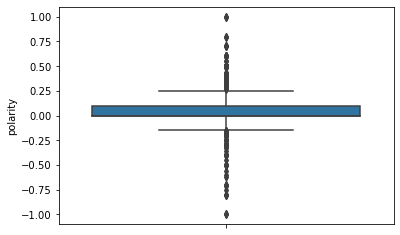

In [14]:
sns.boxplot(y = df['polarity'])

In [8]:
df['title_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='title length',
    linecolor='black',
    yTitle='count',
    title='Title Length Distribution',
    color='blue')

In [9]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Title Word Count Distribution',
    color='blue')

In [10]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)
df1 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df1.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in titles before removing stop words',
    color='blue')


In [11]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)
df2 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df2.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in title after removing stop words',
    color='blue')


In [12]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['title'], 20)
df3 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df3.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in title before removing stop words',
    color='blue')


In [13]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['title'], 20)
df4 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df4.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in title after removing stop words',
    color='blue')


In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['title'], 20)
df3 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df3.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams in title before removing stop words',
    color='blue')


In [16]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['title'], 20)
df4 = pd.DataFrame(common_words, columns = ['title' , 'count'])
df4.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Trigrams in title after removing stop words',
    color='blue')
